In [ ]:
! pip install pydub
! pip install audiosegment
! pip install resampy
! pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=81216 sha256=55cfd80a246f987800c963883bc1f8c39bad072d8147a5bddff0e4275928c0b1
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import os
import csv
import tensorflow as tf
print(tf.version)

# Library
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import IPython
import sklearn
import seaborn as sns
from sklearn.utils import shuffle
import random
import librosa
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import librosa

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import librosa
from joblib import dump, load
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import librosa
from joblib import dump, load
import matplotlib.pyplot as plt

%load_ext tensorboard

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
directory = "/content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)"
output_file = "/content/drive/MyDrive/Product_Capstone_Materials/multiclass.csv"

csv_data = [["Path", "label"]]

for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        path = os.path.join(directory, filename)
        label = filename.split("_")[2].split("-")[0].lower()

        if label in ["taj", "nt", "tajweed_exe"]:
            label = filename.split("_")[3].split("-")[0].lower()

        csv_data.append([path, label])

with open(output_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print("CSV file created successfully.")

CSV file created successfully.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Product_Capstone_Materials/multiclass.csv')
df

,Path,label
0,/content/drive/MyDrive/Product_Capstone_Materi...,faa
1,/content/drive/MyDrive/Product_Capstone_Materi...,faa
2,/content/drive/MyDrive/Product_Capstone_Materi...,faa
3,/content/drive/MyDrive/Product_Capstone_Materi...,faa
4,/content/drive/MyDrive/Product_Capstone_Materi...,faa
...,...,...
4869,/content/drive/MyDrive/Product_Capstone_Materi...,sheen
4870,/content/drive/MyDrive/Product_Capstone_Materi...,sheen
4871,/content/drive/MyDrive/Product_Capstone_Materi...,sheen
4872,/content/drive/MyDrive/Product_Capstone_Materi...,sheen


In [ ]:
df['label'].value_counts()
# ["alif", "noon", "hamzah", "seen", "tua", "laam", "kha", "ghain", "faa", "dal"]

sa        176
faa       169
haa       169
dal       169
aain      169
kha       169
ba        169
ghain     169
noon      169
meem      169
kaif      169
raa       168
zua       168
duad      168
tua       168
seen      168
jeem      168
alif      167
hha       167
laam      167
zhal      166
sheen     166
yaa       166
ta        166
wao       165
hamzah    160
zaa       159
quaf      121
saud      104
suad       64
qauf       48
za          8
lam         2
waow        2
zaal        1
zuad        1
Name: label, dtype: int64

In [ ]:
# Path to the original CSV file
input_csv = "/content/drive/MyDrive/Product_Capstone_Materials/multiclass.csv"

# Labels to include in the new CSV
labels_to_include = ["alif", "noon", "hamzah", "seen", "tua", "laam", "kha", "ghain", "faa", "dal"]

# Read the original CSV into a DataFrame
df = pd.read_csv(input_csv)

# Filter the DataFrame based on the specified labels
df5 = df[df['label'].isin(labels_to_include)]

# Save the filtered DataFrame to a new CSV file
df5.to_csv('/content/drive/MyDrive/Product_Capstone_Materials/filtered_10class.csv', index=False)

print("New CSV file with filtered labels created successfully.")

New CSV file with filtered labels created successfully.


In [ ]:
df5.head()

,Path,label
0,/content/drive/MyDrive/Product_Capstone_Materi...,faa
1,/content/drive/MyDrive/Product_Capstone_Materi...,faa
2,/content/drive/MyDrive/Product_Capstone_Materi...,faa
3,/content/drive/MyDrive/Product_Capstone_Materi...,faa
4,/content/drive/MyDrive/Product_Capstone_Materi...,faa


In [ ]:
df5['label'].value_counts()

faa       169
noon      169
kha       169
ghain     169
dal       169
seen      168
tua       168
laam      167
alif      167
hamzah    160
Name: label, dtype: int64

Epoch 1/10
42/42 [==============================] - 18s 400ms/step - loss: 7.9580 - accuracy: 0.3485 - val_loss: 0.9670 - val_accuracy: 0.6567
Epoch 2/10
42/42 [==============================] - 17s 397ms/step - loss: 0.6843 - accuracy: 0.7769 - val_loss: 0.6034 - val_accuracy: 0.8119
Epoch 3/10
42/42 [==============================] - 17s 400ms/step - loss: 0.2605 - accuracy: 0.9231 - val_loss: 0.4145 - val_accuracy: 0.8716
Epoch 4/10
42/42 [==============================] - 18s 433ms/step - loss: 0.1087 - accuracy: 0.9731 - val_loss: 0.4053 - val_accuracy: 0.8955
Epoch 5/10
42/42 [==============================] - 17s 417ms/step - loss: 0.1153 - accuracy: 0.9642 - val_loss: 0.2891 - val_accuracy: 0.9224
Epoch 6/10
42/42 [==============================] - 17s 403ms/step - loss: 0.0313 - accuracy: 0.9940 - val_loss: 0.2784 - val_accuracy: 0.9194
Epoch 7/10
42/42 [==============================] - 17s 402ms/step - loss: 0.0149 - accuracy: 0.9985 - val_loss: 0.2733 - val_accuracy: 0.9284

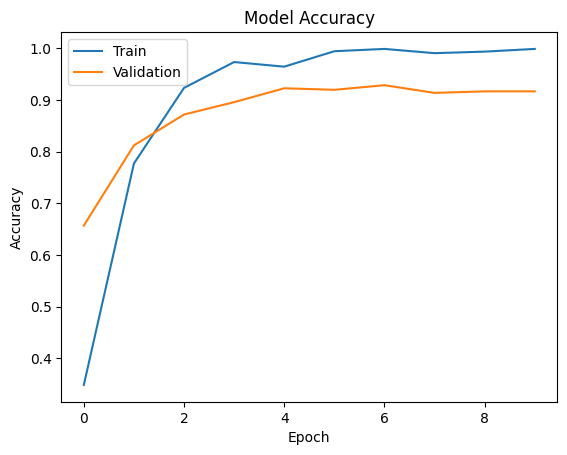

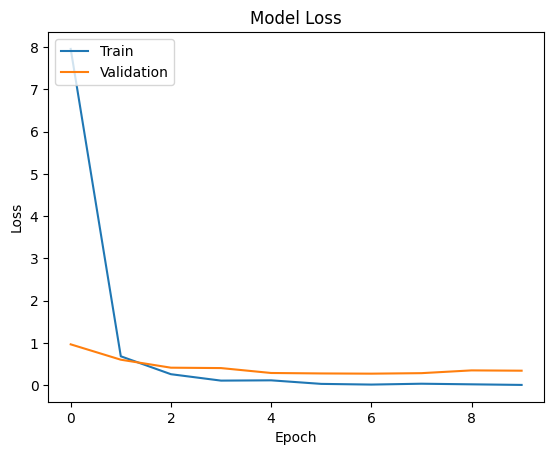

In [ ]:
# Fungsi untuk ekstraksi fitur menggunakan MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur menggunakan Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Load data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Product_Capstone_Materials/filtered_10class.csv')  # Ganti dengan path sesuai dengan file CSV Anda

# Cek cache MFCC
cache_file_mfcc = 'mfcc_cache.joblib'
if os.path.exists(cache_file_mfcc):
    X_mfcc = load(cache_file_mfcc)
else:
    # Ekstraksi fitur MFCC
    X_mfcc = np.array([extract_mfcc(file_path) for file_path in data['Path']])
    dump(X_mfcc, cache_file_mfcc)  # Simpan cache MFCC

# Cek cache Spectrogram
cache_file_spectrogram = 'spectrogram_cache.joblib'
if os.path.exists(cache_file_spectrogram):
    X_spectrogram = load(cache_file_spectrogram)
else:
    # Ekstraksi fitur Spectrogram
    X_spectrogram = np.array([extract_spectrogram(file_path) for file_path in data['Path']])
    dump(X_spectrogram, cache_file_spectrogram)  # Simpan cache Spectrogram

# Encode label menjadi one-hot vector
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(data['label']))

# Split data menjadi data latih dan data uji
X_mfcc_train, X_mfcc_test, X_spectrogram_train, X_spectrogram_test, y_train, y_test = train_test_split(
    X_mfcc, X_spectrogram, y, test_size=0.2, random_state=42)

# Ubah bentuk X_mfcc_train dan X_mfcc_test
X_mfcc_train = np.expand_dims(X_mfcc_train, axis=-1)
X_mfcc_test = np.expand_dims(X_mfcc_test, axis=-1)

# Ubah bentuk X_spectrogram_train dan X_spectrogram_test (jika diperlukan)
X_spectrogram_train = np.expand_dims(X_spectrogram_train, axis=-1)
X_spectrogram_test = np.expand_dims(X_spectrogram_test, axis=-1)

# Buat model CNN untuk MFCC
model_mfcc = Sequential()
model_mfcc.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_mfcc_train.shape[1:]))
model_mfcc.add(MaxPooling2D(pool_size=(2, 2)))
model_mfcc.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_mfcc.add(MaxPooling2D(pool_size=(2, 2)))
model_mfcc.add(Flatten())

# Buat model CNN untuk Spectrogram
model_spectrogram = Sequential()
model_spectrogram.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_spectrogram_train.shape[1:]))
model_spectrogram.add(MaxPooling2D(pool_size=(2, 2)))
model_spectrogram.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_spectrogram.add(MaxPooling2D(pool_size=(2, 2)))
model_spectrogram.add(Flatten())

# Gabungkan output dari model MFCC dan model Spectrogram
combined_input = concatenate([model_mfcc.output, model_spectrogram.output])

# Tambahkan layer Dense setelah penggabungan
combined_input = Dense(128, activation='relu')(combined_input)

# Tambahkan output layer
output = Dense(y_train.shape[1], activation='softmax')(combined_input)

# Buat model baru dengan input dari model sebelumnya
combined_model = Model(inputs=[model_mfcc.input, model_spectrogram.input], outputs=output)

# Compile model
combined_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Latih model
history = combined_model.fit(
    [X_mfcc_train, X_spectrogram_train], y_train,
    validation_data=([X_mfcc_test, X_spectrogram_test], y_test),
    batch_size=32,
    epochs=10,
    callbacks=[early_stopping]
)

# Evaluasi model
score = combined_model.evaluate([X_mfcc_test, X_spectrogram_test], y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Visualisasi hasil pelatihan dan validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Fungsi untuk ekstraksi fitur menggunakan MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur menggunakan Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Load data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Product_Capstone_Materials/filtered_10class.csv')

# Cek cache MFCC
cache_file_mfcc = 'mfcc_cache.joblib'
if os.path.exists(cache_file_mfcc):
    X_mfcc = load(cache_file_mfcc)
else:
    # Ekstraksi fitur MFCC
    X_mfcc = np.array([extract_mfcc(file_path) for file_path in data['Path']])
    dump(X_mfcc, cache_file_mfcc)  # Simpan cache MFCC

# Cek cache Spectrogram
cache_file_spectrogram = 'spectrogram_cache.joblib'
if os.path.exists(cache_file_spectrogram):
    X_spectrogram = load(cache_file_spectrogram)
else:
    # Ekstraksi fitur Spectrogram
    X_spectrogram = np.array([extract_spectrogram(file_path) for file_path in data['Path']])
    dump(X_spectrogram, cache_file_spectrogram)  # Simpan cache Spectrogram

# Encode label menjadi one-hot vector
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(data['label']))

# Split data menjadi data latih dan data uji
X_mfcc_train, X_mfcc_test, X_spectrogram_train, X_spectrogram_test, y_train, y_test = train_test_split(
    X_mfcc, X_spectrogram, y, test_size=0.2, random_state=42)

# Normalisasi fitur
X_mfcc_train = X_mfcc_train[..., np.newaxis]
X_mfcc_test = X_mfcc_test[..., np.newaxis]
X_spectrogram_train = X_spectrogram_train[..., np.newaxis]
X_spectrogram_test = X_spectrogram_test[..., np.newaxis]

# Hyperparameter tuning
learning_rate = 0.001
batch_size = 32
epochs = 10
dropout_rate = 0.2

# Arsitektur model
input_mfcc = tf.keras.Input(shape=(X_mfcc_train.shape[1], X_mfcc_train.shape[2], X_mfcc_train.shape[3]))
conv1_mfcc = Conv2D(32, (3, 3), activation='relu')(input_mfcc)
pool1_mfcc = MaxPooling2D((2, 2))(conv1_mfcc)
conv2_mfcc = Conv2D(64, (3, 3), activation='relu')(pool1_mfcc)
pool2_mfcc = MaxPooling2D((2, 2))(conv2_mfcc)
flatten_mfcc = Flatten()(pool2_mfcc)

input_spectrogram = tf.keras.Input(shape=(X_spectrogram_train.shape[1], X_spectrogram_train.shape[2], X_spectrogram_train.shape[3]))
conv1_spec = Conv2D(32, (3, 3), activation='relu')(input_spectrogram)
pool1_spec = MaxPooling2D((2, 2))(conv1_spec)
conv2_spec = Conv2D(64, (3, 3), activation='relu')(pool1_spec)
pool2_spec = MaxPooling2D((2, 2))(conv2_spec)
flatten_spec = Flatten()(pool2_spec)

concat = concatenate([flatten_mfcc, flatten_spec])

dense1 = Dense(128, activation='relu')(concat)
dropout = tf.keras.layers.Dropout(dropout_rate)(dense1)
output = Dense(y_train.shape[1], activation='softmax')(dropout)

model = Model(inputs=[input_mfcc, input_spectrogram], outputs=output)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Product_Capstone_Materials/model10huruf.h5', save_best_only=True)

# Melatih model
history = model.fit(
    [X_mfcc_train, X_spectrogram_train], y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([X_mfcc_test, X_spectrogram_test], y_test),
    callbacks=[early_stop, model_checkpoint]
)

# Menyimpan model dalam format h5
model.save('/content/drive/MyDrive/Product_Capstone_Materials/model10huruf.h5')

Epoch 1/10
42/42 [==============================] - 15s 328ms/step - loss: 7.7683 - accuracy: 0.3343 - val_loss: 0.9823 - val_accuracy: 0.6896
Epoch 2/10
42/42 [==============================] - 11s 254ms/step - loss: 0.6649 - accuracy: 0.7649 - val_loss: 0.4309 - val_accuracy: 0.8507
Epoch 3/10
42/42 [==============================] - 11s 250ms/step - loss: 0.3185 - accuracy: 0.8955 - val_loss: 0.3159 - val_accuracy: 0.8866
Epoch 4/10
42/42 [==============================] - 12s 281ms/step - loss: 0.1543 - accuracy: 0.9463 - val_loss: 0.2549 - val_accuracy: 0.9164
Epoch 5/10
42/42 [==============================] - 11s 261ms/step - loss: 0.1088 - accuracy: 0.9694 - val_loss: 0.1914 - val_accuracy: 0.9373
Epoch 6/10
42/42 [==============================] - 11s 251ms/step - loss: 0.0773 - accuracy: 0.9769 - val_loss: 0.2513 - val_accuracy: 0.9284
Epoch 7/10
42/42 [==============================] - 11s 259ms/step - loss: 0.0706 - accuracy: 0.9761 - val_loss: 0.2563 - val_accuracy: 0.9343

# Prediksi dengan input berupa .wav acak dari data train

In [ ]:
# Memilih satu data audio secara acak
random_index = random.randint(0, len(data) - 1)
file_path = data['Path'].iloc[random_index]

# Fungsi untuk ekstraksi fitur MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Ekstraksi fitur MFCC dan Spectrogram dari data audio
mfcc_features = extract_mfcc(file_path)
spectrogram_features = extract_spectrogram(file_path)

# Ubah dimensi data untuk model CNN
mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

# Prediksi label menggunakan model
predictions = model.predict([mfcc_features, spectrogram_features])

# Decode label menggunakan label_encoder
predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

print('Path:', file_path)
print('Predicted label:', predicted_label)

1/1 [==============================] - 0s 93ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/0_7_Taj_Dal_T (73).wav
Predicted label: dal


# Prediksi dengan load model H5 dan menggunakan input .wav manual

In [ ]:
# Fungsi untuk ekstraksi fitur MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Load data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Product_Capstone_Materials/filtered_10class.csv')

# Memuat model yang telah disimpan
model = load_model('/content/drive/MyDrive/Product_Capstone_Materials/model10huruf.h5')

# Memilih satu data audio secara acak
random_index = random.randint(0, len(data) - 1)
file_path = "/content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/1_9_Taj_Faa_T (69).wav"

# Ekstraksi fitur MFCC dan Spectrogram dari data audio
mfcc_features = extract_mfcc(file_path)
spectrogram_features = extract_spectrogram(file_path)

# Ubah dimensi data untuk model CNN
mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

# Encode label menjadi one-hot vector
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(data['label']))

# Prediksi label menggunakan model
predictions = model.predict([mfcc_features, spectrogram_features])

# Decode label menggunakan label_encoder
predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

print('Path:', file_path)
print('Predicted label:', predicted_label)

1/1 [==============================] - 0s 130ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/1_9_Taj_Faa_T (69).wav
Predicted label: faa


In [ ]:
# Fungsi untuk ekstraksi fitur MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Load data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Product_Capstone_Materials/filtered_10class.csv')

# Memuat model yang telah disimpan
model = load_model('/content/drive/MyDrive/Product_Capstone_Materials/model10huruf.h5')

# Memilih satu data audio secara acak
random_index = random.randint(0, len(data) - 1)
file_path = "/content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/2_8_Hamzah_T162.wav"

# Ekstraksi fitur MFCC dan Spectrogram dari data audio
mfcc_features = extract_mfcc(file_path)
spectrogram_features = extract_spectrogram(file_path)

# Ubah dimensi data untuk model CNN
mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

# Encode label menjadi one-hot vector
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(data['label']))

# Prediksi label menggunakan model
predictions = model.predict([mfcc_features, spectrogram_features])

# Decode label menggunakan label_encoder
predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

print('Path:', file_path)
print('Predicted label:', predicted_label)

1/1 [==============================] - 0s 138ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/2_8_Hamzah_T162.wav
Predicted label: hamzah


# Prediksi dengan suara asli

In [ ]:
# Fungsi untuk ekstraksi fitur MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Meminta pengguna memasukkan path file audio
file_path = "/content/drive/MyDrive/export.wav"
model = load_model('/content/drive/MyDrive/Product_Capstone_Materials/model10huruf.h5')

# Ekstraksi fitur MFCC dan Spectrogram dari file audio
mfcc_features = extract_mfcc(file_path)
spectrogram_features = extract_spectrogram(file_path)

# Ubah dimensi data untuk model CNN
mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

# Prediksi label menggunakan model
predictions = model.predict([mfcc_features, spectrogram_features])

# Decode label menggunakan label_encoder
predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

print('Path:', file_path)
print('Predicted label:', predicted_label)

1/1 [==============================] - 0s 223ms/step
Path: /content/drive/MyDrive/export.wav
Predicted label: alif


In [ ]:
# Fungsi untuk ekstraksi fitur MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Meminta pengguna memasukkan path file audio
file_path = "/content/drive/MyDrive/seen.wav"
model = load_model('/content/drive/MyDrive/Product_Capstone_Materials/model10huruf.h5')

# Ekstraksi fitur MFCC dan Spectrogram dari file audio
mfcc_features = extract_mfcc(file_path)
spectrogram_features = extract_spectrogram(file_path)

# Ubah dimensi data untuk model CNN
mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

# Prediksi label menggunakan model
predictions = model.predict([mfcc_features, spectrogram_features])

# Decode label menggunakan label_encoder
predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

print('Path:', file_path)
print('Predicted label:', predicted_label)

1/1 [==============================] - 0s 160ms/step
Path: /content/drive/MyDrive/seen.wav
Predicted label: seen


In [ ]:
# Fungsi untuk ekstraksi fitur MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Meminta pengguna memasukkan path file audio
file_path = "/content/drive/MyDrive/hamzah.wav"
model = load_model('/content/drive/MyDrive/Product_Capstone_Materials/model10huruf.h5')

# Ekstraksi fitur MFCC dan Spectrogram dari file audio
mfcc_features = extract_mfcc(file_path)
spectrogram_features = extract_spectrogram(file_path)

# Ubah dimensi data untuk model CNN
mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

# Prediksi label menggunakan model
predictions = model.predict([mfcc_features, spectrogram_features])

# Decode label menggunakan label_encoder
predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

print('Path:', file_path)
print('Predicted label:', predicted_label)

1/1 [==============================] - 0s 168ms/step
Path: /content/drive/MyDrive/hamzah.wav
Predicted label: hamzah


In [ ]:
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import Audio

# Mendefinisikan path audio yang ingin diputar
audio_path = "/content/drive/MyDrive/export.wav"
# Membaca file audio menggunakan pydub
audio = AudioSegment.from_wav(audio_path)

# Memainkan file audio menggunakan IPython.display.Audio
Audio(audio_path)